In [11]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.3.1
2.4.0


In [12]:
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.callbacks import History

The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

* **input_dim**: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
* **output_dim**: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
* **input_length**: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

# Zad. 
Podążamy za stroną: 

https://keras.io/examples/pretrained_word_embeddings/

mamy jakiś zbiór tekstów:

In [13]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='train',categories=['sci.crypt', 'sci.electronics'])

In [14]:
# newsgroups_train.data[0]
print(newsgroups.data[0])

From: tedwards@eng.umd.edu (Thomas Grant Edwards)
Subject: Re: Once tapped, your code is no good any more.
Organization: Project GLUE, University of Maryland, College Park
Lines: 25
Distribution: na
NNTP-Posting-Host: pipa.src.umd.edu

In article <1r1r3nINNebn@dns1.NMSU.Edu> amolitor@nmsu.edu (Andrew Molitor) writes:
>In article <C5so84.Hxv@demon.co.uk> Graham Toal <gtoal@gtoal.com> writes:
>>Actually, I am *completely* baffled by why Dorothy Denning has chosen
>>to throw away her academic respectability like this.

>	Actually, I've been following her remarks for some time, with
>interest. I'm also a member of academia, and her remarks have nothing
>but elevate her respectability in my eyes. It remains to be seen whether
>you are the radical fringe, or I.

>	It is generally an error to assume that your beliefs are held by
>the majority, or even a sizable minority. Especially when you're seeing
>tens, nay dozens, of people on usenet agreeing with you.

The people on usenet are clearly a

In [15]:
X = newsgroups.data
y = newsgroups.target

len(X)

1186

In [16]:
from tensorflow.python.keras.utils import np_utils
y = np_utils.to_categorical(y)
y[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [17]:
import nltk
import string
import re
import pandas as pd

In [18]:
def extract_content(mail):    
    # wyciagniecie tresci maila   
    return mail[mail.find("\n\n"):]

def extract_subject(mail):
    return re.findall(r'Subject:(.+)',mail)[0]


def stem_helper(word,stemmer):
    try:
        y = stemmer.stem(word)
    except:
        y = word
    return y



def clean_text(x, stemmer = nltk.PorterStemmer()):   
    """
    x - jeden mail
    """    
 
    #tokenizacja - rozbicie na liste tokenow
    x_t = nltk.word_tokenize(x)    
    # usuwanie znakow interpunkcyjnych
    translator = str.maketrans('', '', string.punctuation)
    x_t = [word.translate(translator) for word in x_t]    
    # zamina liter male
    x_t = [word.lower() for word in x_t]    
    # usuwanie zbednych tokenow
    x_t = [w for w in x_t if w not in nltk.corpus.stopwords.words("english")+["nt"]]    
    # stemming
    x_t = [stem_helper(word,stemmer) for word in x_t]    
    # sklejenie do napisu
    x_new = ' '.join(x_t)    
    return x_new


X_c = [clean_text(extract_content(x)) for x in X]
X_s = [clean_text(extract_subject(x)) for x in X]

X = pd.DataFrame({"subject":X_s, "content":X_c})

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c,y,test_size=400)
#bierzemy tylko tresc - bez tytulu
print(y_test.shape)

(400, 2)


In [20]:
X_train[0]

'articl  1pohuq  4sq  groupermktcsdharriscom   wdh  groupermktcsdharriscom  w david higgin  write    believ thing need correct  mr vanderbyl    attitud  nope  mr myer found bad mistak post correct  thank god    act child wo gain favor make act    posit impress anybodi  ghod know make impress    posit one  oh  impress mr higgin '

* Do warstwy **Embedding layer** wchodzi sekwencja intów.

* my wykorzystamy reprezenatację Bag of Words

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import History



Sekwencje mają różne długości, a Keras wymaga aby wejścia były równej długość.

* Embeding ma zakres 100 i długość wejściową 20. Zmniejszmy embending do wymiaru 20.
* Model jest prostym klasyfikatorem binarnym. 
* Co ważne, wynik z warstwy Embeding będzie wynosił 4 wektory o 8 wymiarach każdy, po jednym dla każdego słowa. 
* Spłaszczamy to do jednego 32-elementowego wektora, aby przejść do warstwy wyjściowej Dense.

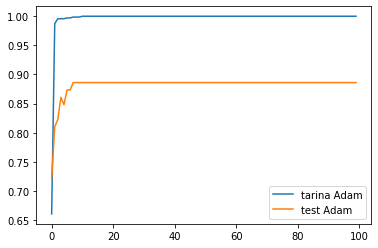

In [35]:
plt.plot(history_1.history['accuracy'], label = "tarina Adam")
plt.plot(history_1.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()

# Pretrain embedding

https://keras.io/examples/pretrained_word_embeddings/

* GloVe embedding data can be found at: http://nlp.stanford.edu/data/glove.6B.zip (source page: http://nlp.stanford.edu/projects/glove/)

* After downloading and unzipping, you will see a few files, one of which is “glove.6B.50d.txt“, which contains a 100-dimensional version of the embedding.


Pojedyńczy plik można pobrać z tąd:
https://www.dropbox.com/sh/tjq47ybybgnrbel/AAAVbp0UkQTAbKWVMIi5mtHpa?dl=0

In [36]:
BASE_DIR = ''
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B.50d')
# first, build index mapping words in the embeddings set
# to their embedding vector




Indexing word vectors.
Loaded 400000 word vectors.


In [37]:
embeddings_index["the"]

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

Keras provides a Tokenizer class that can be fit on the training data, can convert text to sequences consistently by calling the texts_to_sequences() method on the Tokenizer class, and provides access to the dictionary mapping of words to integers in a word_index attribute.

https://keras.io/preprocessing/text/#tokenizer

Sekwencje mają różne długości, a Keras wymaga aby wejścia były równej długość.

Next, we need to create a matrix of one embedding for each word in the training dataset. We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight vector from the loaded GloVe embedding.

The result is a matrix of weights only for words we will see during training.

The key difference is that the embedding layer can be seeded with the GloVe word embedding weights. We chose the 50-dimensional version, therefore the Embedding layer must be defined with output_dim set to 50. Finally, we do not want to update the learned word weights in this model, therefore we will set the trainable attribute for the model to be False.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 50)            626150    
_________________________________________________________________
flatten_8 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 2002      
Total params: 628,152
Trainable params: 2,002
Non-trainable params: 626,150
_________________________________________________________________
None


In [47]:
model.fit(padded_docs, y_train, epochs=100, validation_split=0.1, callbacks=[history_2])

Epoch 1/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7078 - accuracy: 0.5050 - val_loss: 0.7446 - val_accuracy: 0.5063
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.6662 - val_loss: 0.6985 - val_accuracy: 0.5190
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7242 - val_loss: 0.6823 - val_accuracy: 0.5823
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7836 - val_loss: 0.6800 - val_accuracy: 0.6076
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8190 - val_loss: 0.6630 - val_accuracy: 0.6076
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8359 - val_loss: 0.6524 - val_accuracy: 0.6203
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8515 - val_loss: 0.6361 - val_accuracy: 0.6709
Epoch 8/100
2

Epoch 59/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.6504 - val_accuracy: 0.7975
Epoch 60/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.6478 - val_accuracy: 0.7975
Epoch 61/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.6456 - val_accuracy: 0.7975
Epoch 62/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.6576 - val_accuracy: 0.7975
Epoch 63/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.6540 - val_accuracy: 0.8101
Epoch 64/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.6518 - val_accuracy: 0.8228
Epoch 65/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 0.6595 - val_accuracy: 0.7975
Epoch 

In [50]:
loss, accuracy = model.evaluate(padded_docs, y_train, verbose=0)
print('Accuracy: %f' % (accuracy))

Accuracy: 0.980916


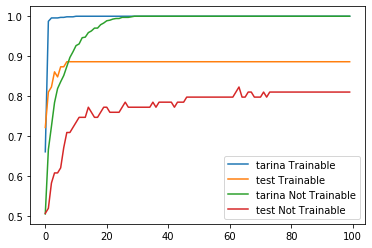

In [51]:
plt.plot(history_1.history['accuracy'], label = "tarina Trainable")
plt.plot(history_1.history['val_accuracy'], label = "test Trainable")

plt.plot(history_2.history['accuracy'], label = "tarina Not Trainable")
plt.plot(history_2.history['val_accuracy'], label = "test Not Trainable")


plt.legend()
plt.show()